<font size='2.5'>

**AIM 5014** |
**Nosson Weissman** |
**Dr. Sai P Kadiyala** |
**Reinforcement Learning Quiz**
</font>

# SARSA vs. Q-learning 

<font size='1'> 

**The text was submitted in the docx part of this assignment, but was included here for context** <br>
    
1)
    
**Q-learning** can be summarized as follows:
For each state we find an optimal Q function Q\*, where Q\*(s,a) yields the max reward for an action in a given state (it must follow the Bellman optimality equation). We use a table to store reward values for each action at each state.

- Off-policy
- As an off-policy method, Q-learning improves on the value function assuming a greedy policy is being followed, even though it is not following a greedy policy
- Chooses an action, records the result and then updates value with different action
- Uses value function to determine action

**SARSA** , short for State Action Reward State Action, is used to learn MDP policies. SARSA is similar to Q-learning but is an on-policy method.

- On-policy
- As an on-policy method, SARSA improves on the value function of the current policy being used
- Chooses an action, not necessarily the best one and notes the outcome and uses that information to update value function

**Both SARSA and Q-learning** do not require model knowledge. Like MC methods, information is gathered by observing experimental runs, but unlike MC we can update the state-action value function after each step instead of waiting until the end on an episode.

2)

**SARSA**

- Learns near-optimal policy while exploring
- More conservative; more likely to avoid dangerous optimal path
- Lower per-sample variance than Q-learning

**Q-Learning**

- Directly learns optimal policy
- Low cost, fast iterating
- More &quot;courageous&quot;; more likely to find a dangerous optimal path, risking a large negative reward
    </font>

In [2]:
import numpy as np
import gym

Code contained in this notebook can be found in
<a href="https://github.com/philtabor/Youtube-Code-Repository/tree/master/ReinforcementLearning/Fundamentals">
this repo by philtabor
</a>


**In this notebook we demonstrate two solutions to the pole-cart toy problem
While SARSA and Q-learning are very similar in many ways, one trait of Q-learning which stands out in this notebook is its willingness to try risky paths. 
In the output for the Q-learning solution, some of the episodes show that the reward is "an outlier". In this context we defined a reward total as an outlier if it was less than 25% the mean of 500 preceeding entries.**

## SARSA

The code below uses the pole-cart toy problem to demonstrate n-step SALSA

In [ ]:
# load requisite libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
import time

In [ ]:
# maxAction returns action which will yield the greatest return from our current state
def maxAction(Q, state):    
    values = np.array([Q[state,a] for a in range(2)])
    action = np.argmax(values)
    return action

In [ ]:
# here we create discreet points which we will be using 
# to simulate an actual coninuous space (with infinitly many points)
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleThetaVelSpace = np.linspace(-4, 4, 10)
cartPosSpace = np.linspace(-2.4, 2.4, 10)
cartVelSpace = np.linspace(-4, 4, 10)

In [ ]:
# get_state() breaks down an observation to describe
# what is happening more explicitly
def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))

    return (cartX, cartXdot, cartTheta, cartThetadot)

starting game 0 
total_elapsed time: 0.02 seconds 

starting game 5000 
total_elapsed time: 10.15 seconds 

starting game 10000 
total_elapsed time: 26.74 seconds 

starting game 15000 
total_elapsed time: 60.22 seconds 

starting game 20000 
total_elapsed time: 120.41 seconds 

starting game 25000 
total_elapsed time: 190.49 seconds 

starting game 30000 
total_elapsed time: 245.71 seconds 

starting game 35000 
total_elapsed time: 301.30 seconds 

starting game 40000 
total_elapsed time: 356.62 seconds 

starting game 45000 
total_elapsed time: 429.46 seconds 



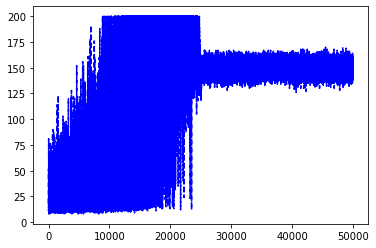

In [18]:
if __name__ == '__main__':
    time_0 = time.time()
    env = gym.make('CartPole-v0')
# model hyperparameters
    ALPHA = 0.1
    GAMMA = 0.9    
    EPS = 1.0

#construct state space
# contains an entry for every possible state in this environment
# regardless of the pole position, cart position, 
# pole velocity or cart velocity, there exists an entry in states[] for any scenario
    states = []
    for i in range(len(cartPosSpace)+1):
        for j in range(len(cartVelSpace)+1):
            for k in range(len(poleThetaSpace)+1):
                for l in range(len(poleThetaVelSpace)+1):
                    states.append((i,j,k,l))

# the following is based on the algorithm in Sutton and Barto pg 120 
# 'n-step Sarsa for estimating Q ... for a given \pi

# declare a dictionary, Q, which holds rewards for state-action pairs
    Q = {}
    for s in states:
        for a in range(2):
            # intializing Q for all s,a pairs
            Q[s, a] = 0

# numGames == num_episodes
    numGames = 50000
    totalRewards = np.zeros(numGames)
    for i in range(numGames):
        if i % 5000 == 0:
            print('starting game', i,
                 '\ntotal_elapsed time: %.2f seconds' % (time.time()-time_0),'\n')
# cart x position, cart velocity, pole theta, pole velocity
# Initialize and store S_0 6= terminal
        observation = env.reset()        
        s = getState(observation)
        rand = np.random.random()
        a = maxAction(Q, s) if rand < (1-EPS) else env.action_space.sample()
        done = False
        epRewards = 0
        while not done:
            observation_, reward, done, info = env.step(a)   
            s_ = getState(observation_)
            rand = np.random.random()
            a_ = maxAction(Q, s_) if rand < (1-EPS) else env.action_space.sample()
            epRewards += reward
            Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,a_] - Q[s,a])
            s, a = s_, a_            
        EPS -= 2/(numGames) if EPS > 0 else 0
# Here we define outlier as any epsodic reward less than 25% the mean of 500 preceeding entries
        if i > 1000 and epRewards < np.mean(totalRewards[-500:])*0.1:
            print(epRewards)
        totalRewards[i] = epRewards

    plt.plot(totalRewards, 'b--')
    plt.show()    

## Q-Learning

The code below uses the pole-cart toy problem to demonstrate Q-learning

0 1.0000 20.0
100 0.0995 18.0
200 0.0705 23.0
300 0.0576 20.0
400 0.0499 162.0
500 0.0447 200.0
600 0.0408 200.0
700 0.0378 200.0
800 0.0353 200.0
900 0.0333 200.0
1000 0.0316 200.0
1100 0.0301 200.0
1200 0.0289 200.0
1300 0.0277 200.0
1400 0.0267 200.0
1500 0.0258 200.0
episode outlier:  43.0
1600 0.0250 200.0
1700 0.0242 200.0
1800 0.0236 200.0
1900 0.0229 200.0
2000 0.0224 200.0
episode outlier:  14.0
2100 0.0218 200.0
2200 0.0213 200.0
2300 0.0208 200.0
episode outlier:  17.0
2400 0.0204 200.0
2500 0.0200 200.0
2600 0.0196 200.0
2700 0.0192 200.0
2800 0.0189 200.0
2900 0.0186 200.0
episode outlier:  15.0
3000 0.0183 200.0
3100 0.0180 200.0
3200 0.0177 200.0
3300 0.0174 200.0
3400 0.0171 200.0
3500 0.0169 200.0
3600 0.0167 200.0
3700 0.0164 200.0
3800 0.0162 200.0
3900 0.0160 200.0
4000 0.0158 200.0
4100 0.0156 200.0
4200 0.0154 200.0
4300 0.0152 200.0
4400 0.0151 200.0
4500 0.0149 200.0
4600 0.0147 200.0
4700 0.0146 200.0
4800 0.0144 200.0
4900 0.0143 200.0
5000 0.0141 200.0
5100 0

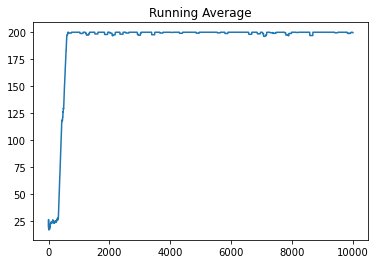

In [29]:
import gym
import numpy as np 
import matplotlib.pyplot as plt 

env = gym.make('CartPole-v0')

MAXSTATES = 10**4
GAMMA = 0.9
ALPHA = 0.01

def max_dict(d):
    max_v = float('-inf')
    for key, val in d.items():
        if val > max_v:
            max_v = val
            max_key = key
    return max_key, max_v

def create_bins():
    # obs[0] -> cart position --- -4.8 - 4.8
    # obs[1] -> cart velocity --- -inf - inf
    # obs[2] -> pole angle    --- -41.8 - 41.8
    # obs[3] -> pole velocity --- -inf - inf

    bins = np.zeros((4,10))
    bins[0] = np.linspace(-4.8, 4.8, 10)
    bins[1] = np.linspace(-5, 5, 10)
    bins[2] = np.linspace(-.418, .418, 10)
    bins[3] = np.linspace(-5, 5, 10)

    return bins

def assign_bins(observation, bins):
    state = np.zeros(4)
    for i in range(4):
        state[i] = np.digitize(observation[i], bins[i])
    return state

def get_state_as_string(state):
    string_state = ''.join(str(int(e)) for e in state)
    return string_state

def get_all_states_as_string():
    states = []
    for i in range(MAXSTATES):
        states.append(str(i).zfill(4))
    return states

def initialize_Q():
    Q = {}

    all_states = get_all_states_as_string()
    for state in all_states:
        Q[state] = {}
        for action in range(env.action_space.n):
            Q[state][action] = 0
    return Q

def play_one_game(bins, Q, eps=0.5):
    observation = env.reset()
    done = False
    cnt = 0 # number of moves in an episode
    state = get_state_as_string(assign_bins(observation, bins))
    total_reward = 0

    while not done:
        cnt += 1	
        # np.random.randn() seems to yield a random action 50% of the time ?
        if np.random.uniform() < eps:
            act = env.action_space.sample() # epsilon greedy
        else:			
            act = max_dict(Q[state])[0]

        observation, reward, done, _ = env.step(act)

        total_reward += reward

        if done and cnt < 200:
            reward = -300

        state_new = get_state_as_string(assign_bins(observation, bins))

        a1, max_q_s1a1 = max_dict(Q[state_new])
        Q[state][act] += ALPHA*(reward + GAMMA*max_q_s1a1 - Q[state][act])
        state, act = state_new, a1					

    return total_reward, cnt

def play_many_games(bins, N=10000):
    Q = initialize_Q()

    length = []
    reward = []
    for n in range(N):
        #eps=0.5/(1+n*10e-3)
        eps = 1.0 / np.sqrt(n+1)

        episode_reward, episode_length = play_one_game(bins, Q, eps)

        if n % 100 == 0:
            print(n, '%.4f' % eps, episode_reward)

        if n > 1000 and episode_reward < np.mean(reward[-500:])*0.25:
            print('episode outlier: ',episode_reward)
        length.append(episode_length)
        reward.append(episode_reward)

    return length, reward

def plot_running_avg(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(totalrewards[max(0, t-100):(t+1)])
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

if __name__ == '__main__':
    bins = create_bins()
    episode_lengths, episode_rewards = play_many_games(bins)

    plot_running_avg(episode_rewards)